In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
hospital_data = pd.read_csv('HospInfo.csv')
hospital_data.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"


In [4]:
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 29 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4812 non-null   int64 
 1   Hospital Name                                                  4812 non-null   object
 2   Address                                                        4812 non-null   object
 3   City                                                           4812 non-null   object
 4   State                                                          4812 non-null   object
 5   ZIP Code                                                       4812 non-null   int64 
 6   County Name                                                    4797 non-null   object
 7   Phone Number                                                   4812 n

In [5]:
def num_missing(x):
    return sum(x.isnull())

print('Missing values per column:')
print(hospital_data.apply(num_missing, axis=0))

Missing values per column:
Provider ID                                                         0
Hospital Name                                                       0
Address                                                             0
City                                                                0
State                                                               0
ZIP Code                                                            0
County Name                                                        15
Phone Number                                                        0
Hospital Type                                                       0
Hospital Ownership                                                  0
Emergency Services                                                  0
Meets criteria for meaningful use of EHRs                         144
Hospital overall rating                                             0
Hospital overall rating footnote                               

In [7]:
hospital_data.isna().sum()

Provider ID                                                         0
Hospital Name                                                       0
Address                                                             0
City                                                                0
State                                                               0
ZIP Code                                                            0
County Name                                                        15
Phone Number                                                        0
Hospital Type                                                       0
Hospital Ownership                                                  0
Emergency Services                                                  0
Meets criteria for meaningful use of EHRs                         144
Hospital overall rating                                             0
Hospital overall rating footnote                                 3414
Mortality national c

In [9]:
hospital_data.drop('Location', axis=1, inplace=True)

In [10]:
hospital_data.shape

(4812, 28)

In [11]:
hospital_data.describe()

,Provider ID,ZIP Code,Phone Number
count,4812.000000,4812.000000,4.812000e+03
mean,268294.422901,53990.132377,5.848244e+09
std,157109.340215,26915.916870,2.332196e+09
min,10001.000000,603.000000,9.369338e+08
25%,140185.750000,33015.250000,4.014563e+09
50%,260043.500000,55410.500000,6.053360e+09
75%,390222.250000,76035.500000,7.877574e+09
max,670118.000000,99929.000000,9.898943e+09


In [12]:
hospital_data.columns.to_list()

['Provider ID',
 'Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number',
 'Hospital Type',
 'Hospital Ownership',
 'Emergency Services',
 'Meets criteria for meaningful use of EHRs',
 'Hospital overall rating',
 'Hospital overall rating footnote',
 'Mortality national comparison',
 'Mortality national comparison footnote',
 'Safety of care national comparison',
 'Safety of care national comparison footnote',
 'Readmission national comparison',
 'Readmission national comparison footnote',
 'Patient experience national comparison',
 'Patient experience national comparison footnote',
 'Effectiveness of care national comparison',
 'Effectiveness of care national comparison footnote',
 'Timeliness of care national comparison',
 'Timeliness of care national comparison footnote',
 'Efficient use of medical imaging national comparison',
 'Efficient use of medical imaging national comparison footnote']

In [13]:
unique_hospital_ownership= hospital_data['Hospital Ownership'].unique()

In [14]:
unique_hospital_ownership

array(['Government - Hospital District or Authority', 'Proprietary',
       'Government - Local', 'Voluntary non-profit - Private', 'Tribal',
       'Government - Federal', 'Voluntary non-profit - Other',
       'Voluntary non-profit - Church', 'Physician', 'Government - State'],
      dtype=object)

In [15]:
dummy_data = pd.get_dummies(hospital_data['Hospital Ownership'])
dummy_data.head()

,Government - Federal,Government - Hospital District or Authority,Government - Local,Government - State,Physician,Proprietary,Tribal,Voluntary non-profit - Church,Voluntary non-profit - Other,Voluntary non-profit - Private
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [16]:
a=dummy_data['Government - Federal'].sum()
b=dummy_data['Government - Hospital District or Authority'].sum()
c=dummy_data['Government - Local'].sum()
d=dummy_data['Government - State'].sum()
e=dummy_data['Physician'].sum()
f=dummy_data['Proprietary'].sum()
g=dummy_data['Tribal'].sum()
h=dummy_data['Voluntary non-profit - Church'].sum()
i=dummy_data['Voluntary non-profit - Other'].sum()
j=dummy_data['Voluntary non-profit - Private'].sum()
list=[a,b,c,d,e,f,g,h,i,j]
list

[45, 561, 407, 65, 68, 800, 9, 343, 462, 2052]

[Text(0.5, 0, 'Number of hospitals'), Text(0, 0.5, 'Ownership')]

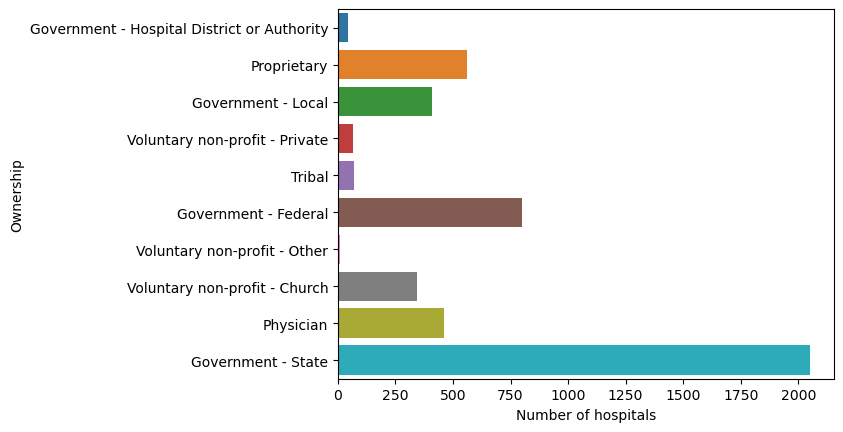

In [17]:
ax = sns.barplot(y=unique_hospital_ownership, x=list, data=hospital_data)
ax.set(xlabel='Number of hospitals', ylabel='Ownership')

Text(0.5, 1.0, 'Total rating of the types of hospitals under the ownership of various community')

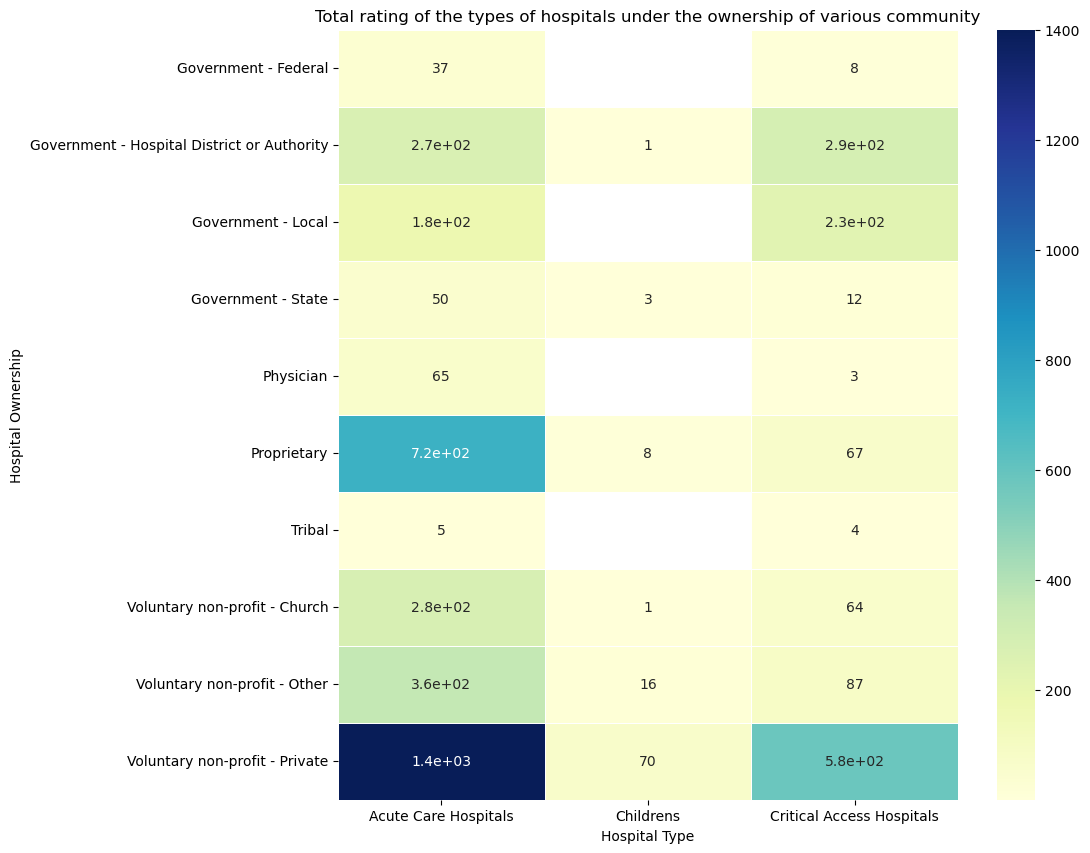

In [19]:
a = pd.pivot_table(hospital_data, values=['Hospital overall rating'], index=['Hospital Ownership'], columns=['Hospital Type'], aggfunc='count', margins=False)
plt.figure(figsize=(10,10))
sns.heatmap(a['Hospital overall rating'], linewidths=.5, annot=True, vmin=0.01, cmap='YlGnBu')
plt.title('Total rating of the types of hospitals under the ownership of various community')

In [20]:
hospital_data['Hospital overall rating'].unique()

array(['3', '4', 'Not Available', '2', '5', '1'], dtype=object)

In [21]:
AvailableRating_data = hospital_data.drop(hospital_data[hospital_data['Hospital overall rating']=='Not Available'].index)

In [23]:
sorted_rating = AvailableRating_data.sort_values(['Hospital overall rating'], ascending=False)
sorted_rating['Hospital overall rating'].head()
sorted_rating[['Hospital Name', 'Hospital overall rating']].head()

,Hospital Name,Hospital overall rating
1044,SCRIPPS MEMORIAL HOSPITAL LA JOLLA,5
3969,"OKLAHOMA HEART HOSPITAL, LLC",5
3549,ROPER HOSPITAL,5
1907,SCHNECK MEDICAL CENTER,5
4497,TEXAS HEALTH HARRIS METHODIST HOSPITAL SOUTHWE...,5


In [24]:
rating_with_5=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='5']
Rating_5=rating_with_5['Provider ID'].count()
rating_with_4=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='4']
Rating_4=rating_with_4['Provider ID'].count()
rating_with_3=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='3']
Rating_3=rating_with_3['Provider ID'].count()
rating_with_2=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='2']
Rating_2=rating_with_2['Provider ID'].count()
rating_with_1=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='1']
Rating_1=rating_with_1['Provider ID'].count()

list=[Rating_5,Rating_4,Rating_3,Rating_2,Rating_1]
list
print(Rating_5,Rating_4,Rating_3,Rating_2,Rating_1)

82 939 1761 678 107


In [26]:
Unique_sorted_rating=sorted_rating['Hospital overall rating'].unique()
Unique_sorted_rating

array(['5', '4', '3', '2', '1'], dtype=object)

[Text(0.5, 0, 'Rating out of 5'), Text(0, 0.5, 'Number of hospitals')]

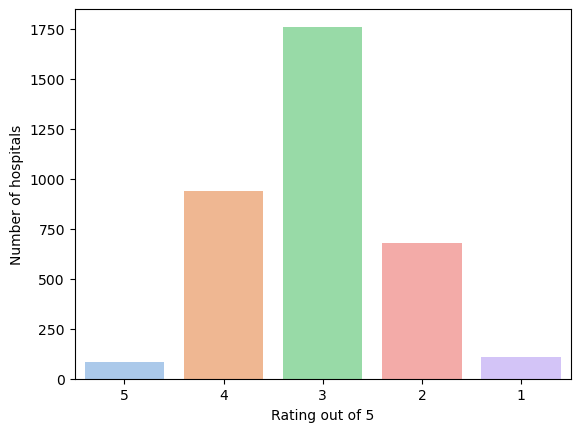

In [27]:
ax = sns.barplot(x = Unique_sorted_rating, y=list, data= hospital_data, palette='pastel')
ax.set(xlabel='Rating out of 5', ylabel='Number of hospitals')

In [29]:
State_acute_5 = hospital_data.loc[(hospital_data['Hospital Type']=='Acute Care Hospitals') & (hospital_data['Hospital overall rating']=='5'), ['State']]

In [31]:
State_acute_5.head()

,State
27,CA
241,OH
251,OK
424,CA
445,AL


In [32]:
S_A_5 = State_acute_5['State'].value_counts()
index= S_A_5.index
values = S_A_5.values
values

array([11,  6,  6,  5,  5,  4,  4,  4,  4,  3,  2,  2,  2,  2,  2,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

[Text(0.5, 0, 'Total number of Acute Care hospitals with 5 rating'),
 Text(0, 0.5, 'States')]

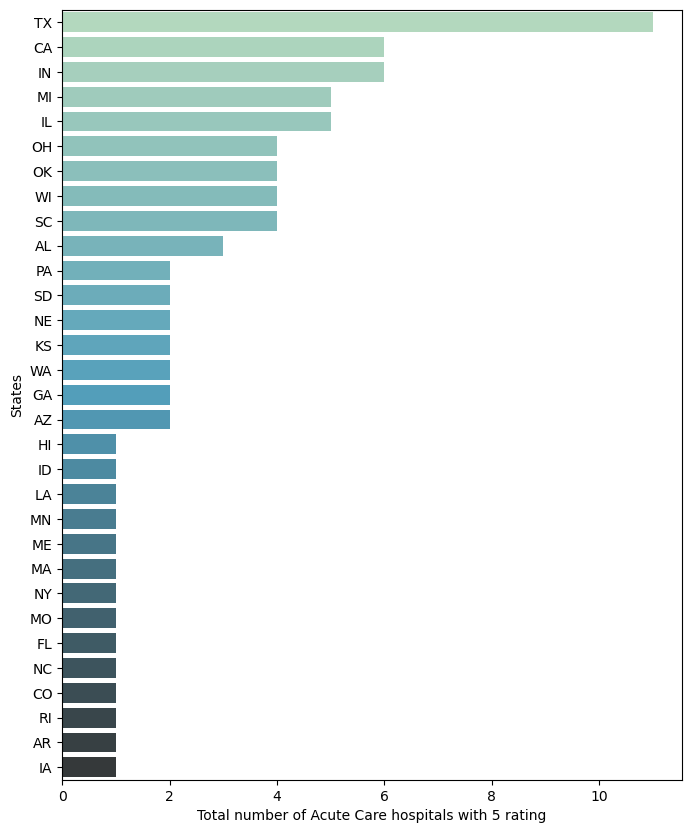

In [33]:
fig, ax = plt.subplots(figsize=(8,10))
ax = sns.barplot(y=index, x=values, palette='GnBu_d')
ax.set(xlabel='Total number of Acute Care hospitals with 5 rating', ylabel='States')

In [36]:
Critical_access_5 = hospital_data.loc[(hospital_data['Hospital Type']=='Critical Access Hospitals') & (hospital_data['Hospital overall rating']=='5'), ['State']]
C_A_5 = Critical_access_5['State'].value_counts()
C_A_5
index=C_A_5.index
values = C_A_5.values
values

array([1, 1])

[Text(0.5, 0, 'Total number of Critical Care hospitals with 5 rating'),
 Text(0, 0.5, 'States')]

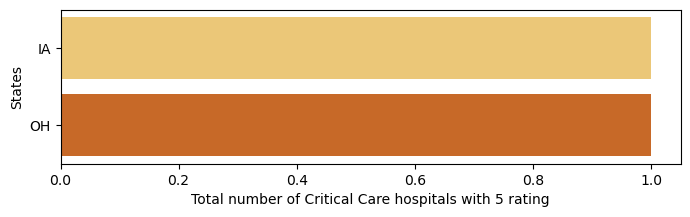

In [37]:
fig, ax = plt.subplots(figsize=(8,2))
ax = sns.barplot(y=index, x=values, palette='YlOrBr')
ax.set(xlabel='Total number of Critical Care hospitals with 5 rating', ylabel='States')

In [38]:
Childrens_5 = hospital_data.loc[(hospital_data['Hospital Type']=='Childrens') & (hospital_data['Hospital overall rating']=='5'), ['State']]
C_5 = Childrens_5['State'].value_counts()
C_5
index=C_5.index
values=C_5.values
values
index

Index([], dtype='object')

In [39]:
State_acute_1 = hospital_data.loc[(hospital_data['Hospital Type']=='Acute Care Hospitals') & (hospital_data['Hospital overall rating']=='1'), ['State']]
S_A_1 = State_acute_1['State'].value_counts()
index= S_A_1.index
values = S_A_1.values
values

array([33,  9,  7,  6,  6,  5,  4,  4,  4,  3,  3,  2,  2,  2,  2,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

[Text(0.5, 0, 'Total number of Acute Care hospitals with 1 rating'),
 Text(0, 0.5, 'States')]

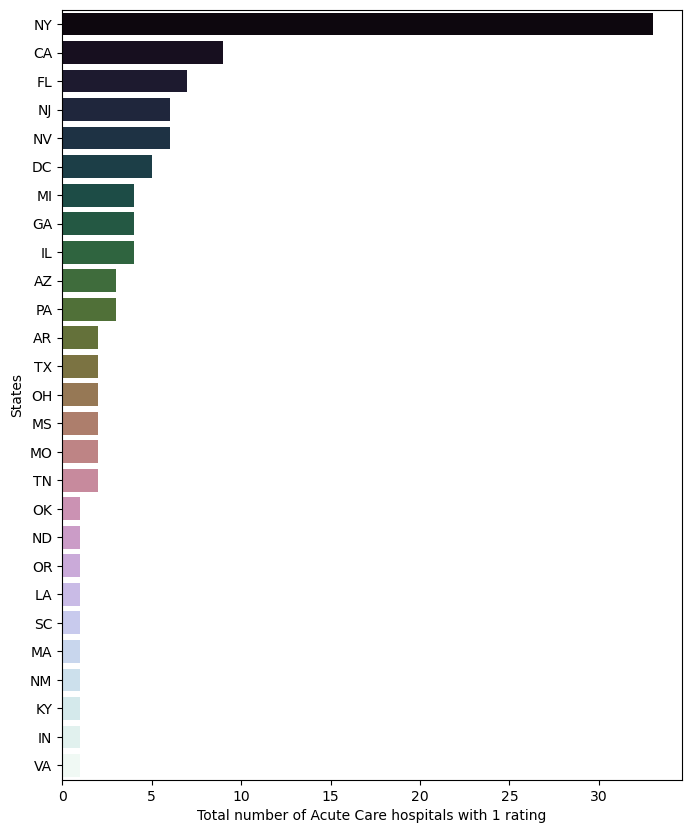

In [40]:
fig, ax = plt.subplots(figsize=(8,10))
ax = sns.barplot(y=index, x=values, palette='cubehelix')
ax.set(xlabel='Total number of Acute Care hospitals with 1 rating', ylabel='States')

In [41]:
Critical_access_1 = hospital_data.loc[(hospital_data['Hospital Type']=='Critical Access Hospitals') & (hospital_data['Hospital overall rating']=='1'), ['State']]
C_A_1 = Critical_access_1['State'].value_counts()
C_A_1
index=C_A_1.index
values = C_A_1.values
values

array([1])

[Text(0.5, 0, 'Total number of Critical Care hospitals with 1 rating'),
 Text(0, 0.5, 'States')]

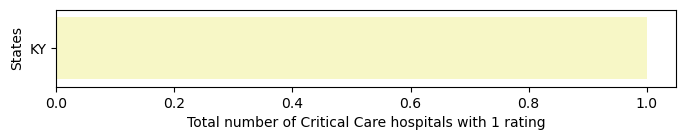

In [42]:
fig, ax = plt.subplots(figsize=(8,1))
ax = sns.barplot(y=index, x=values, palette='Spectral')
ax.set(xlabel='Total number of Critical Care hospitals with 1 rating', ylabel='States')

In [43]:
Childrens_1 = hospital_data.loc[(hospital_data['Hospital Type']=='Childrens') & (hospital_data['Hospital overall rating']=='1'), ['State']]
C_1 = Childrens_5['State'].value_counts()
C_1
index=C_1.index
values=C_1.values
values
index

Index([], dtype='object')

In [44]:
unique_hospital_type = hospital_data['Hospital Type'].unique()

In [50]:
hospital_type = hospital_data.loc[hospital_data['Hospital Type'] == 'Acute Care Hospitals']
Acute_care = hospital_type['Hospital Type'].count()

hospital_type = hospital_data.loc[hospital_data['Hospital Type'] == 'Critical Access Hospitals']
Critical_Acess = hospital_type['Hospital Type'].count()

hospital_type = hospital_data.loc[hospital_data['Hospital Type'] == 'Childrens']
Childrens = hospital_type['Hospital Type'].count()

list=[Acute_care, Critical_Acess, Childrens]
list

[3369, 1344, 99]

[Text(0.5, 0, 'Types of hospitals'), Text(0, 0.5, 'Number of hospitas')]

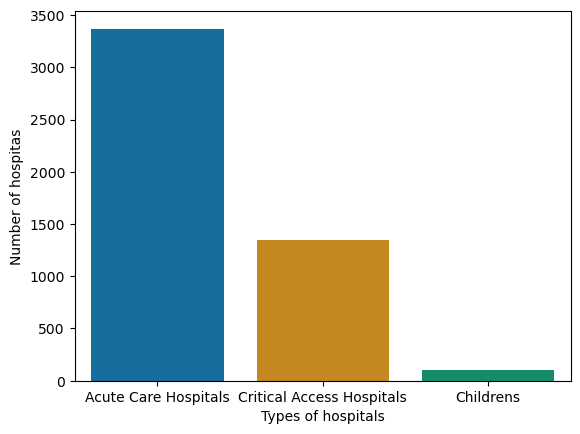

In [51]:
ax = sns.barplot(x=unique_hospital_type, y=list, data=hospital_data, palette='colorblind')
ax.set(xlabel='Types of hospitals', ylabel='Number of hospitas')

In [52]:
hospital_data['Hospital overall rating'].unique()

array(['3', '4', 'Not Available', '2', '5', '1'], dtype=object)

In [53]:
clean_hospital_data = hospital_data.drop(hospital_data[hospital_data['Hospital overall rating']=='Not Available'].index)
clean_hospital_data['Hospital overall rating'].unique()

array(['3', '4', '2', '5', '1'], dtype=object)

In [54]:
clean_hospital_data['Hospital overall rating'] = clean_hospital_data['Hospital overall rating'].astype(float)

In [56]:
clean_hospital_data['Hospital overall rating'].mean()

3.059153350154191

In [55]:
clean_hospital_data['Hospital overall rating'].mean()
clean_hospital_data['Hospital overall rating'].count()

3567

In [57]:
Statewise_avarage_rating= clean_hospital_data.groupby('State')['Hospital overall rating'].mean()

In [58]:
Statewise_avarage_rating

State
AK    2.888889
AL    3.050633
AR    2.836364
AZ    2.944444
CA    2.841379
CO    3.450980
CT    2.714286
DC    1.428571
DE    3.666667
FL    2.662722
GA    2.935185
GU    3.000000
HI    3.307692
IA    3.394366
ID    3.526316
IL    3.132075
IN    3.481481
KS    3.344828
KY    2.975904
LA    3.126582
MA    3.192982
ME    3.437500
MI    3.191304
MN    3.531646
MO    3.011628
MS    2.777778
MT    3.347826
NC    3.106383
ND    3.187500
NE    3.291667
NH    3.480000
NJ    2.546875
NM    2.709677
NV    2.400000
NY    2.320261
OH    3.378571
OK    3.148148
OR    3.153846
PA    3.006803
PR    2.111111
RI    3.272727
SC    3.192308
SD    3.857143
TN    2.870968
TX    3.231061
UT    3.448276
VA    3.013158
VI    2.000000
VT    3.250000
WA    3.015152
WI    3.611111
WV    2.756757
WY    3.000000
Name: Hospital overall rating, dtype: float64

In [59]:
index = Statewise_avarage_rating.sort_values(ascending=False).index
values = Statewise_avarage_rating.sort_values(ascending=False).values

[Text(0.5, 0, 'Average rating og the hospitals'), Text(0, 0.5, 'State')]

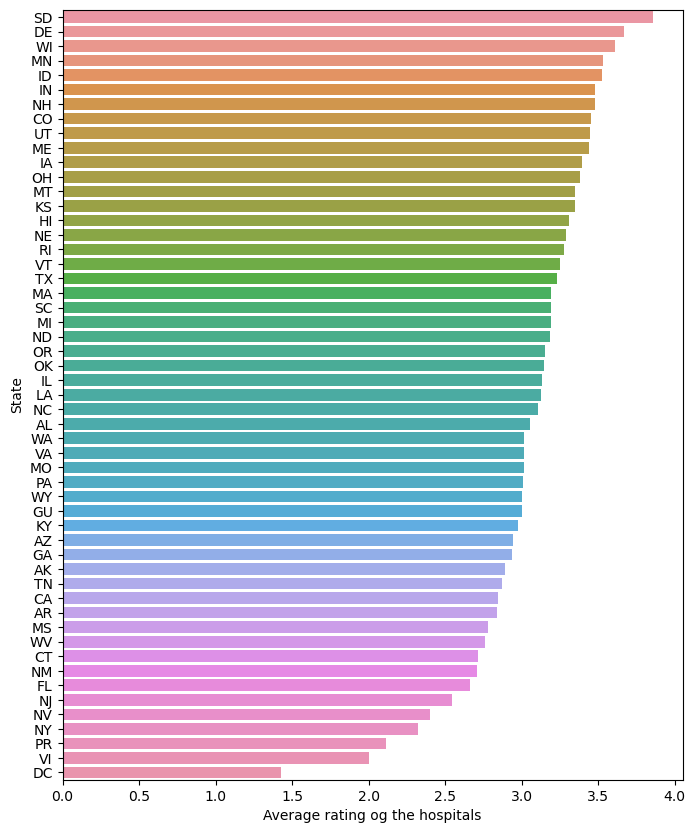

In [60]:
fig, ax = plt.subplots(figsize=(8,10))
ax = sns.barplot(x=values, y=index)
ax.set(xlabel='Average rating og the hospitals', ylabel = 'State')

In [62]:
Mortality_NotAvailable = hospital_data.loc[hospital_data['Mortality national comparison']=='Not Available']

In [63]:
Mortality_NotAvailable['Mortality national comparison'].count()

1352

In [64]:
Non_available_data = Mortality_NotAvailable.groupby('Hospital Type')['Mortality national comparison'].count()

In [65]:
Non_available_data.sort_values(ascending=False)

Hospital Type
Critical Access Hospitals    736
Acute Care Hospitals         517
Childrens                     99
Name: Mortality national comparison, dtype: int64

In [66]:
index = Non_available_data.sort_values(ascending=False).index
values = Non_available_data.sort_values(ascending=False).values

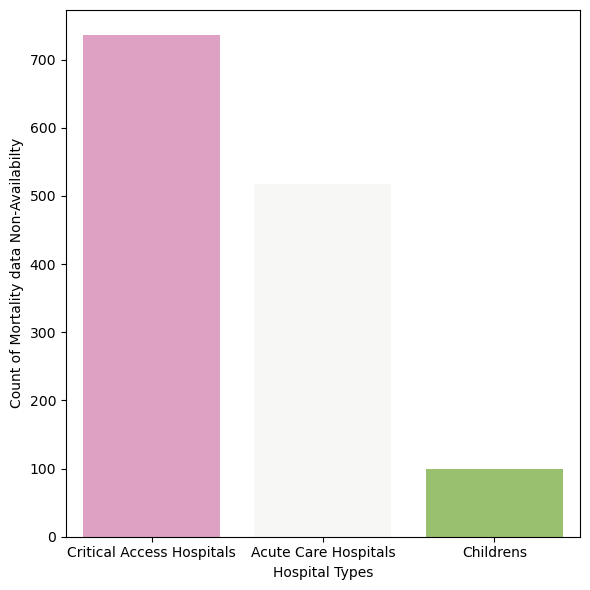

In [69]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.barplot(y=values, x=index, palette='PiYG')
ax.set(xlabel='Hospital Types', ylabel='Count of Mortality data Non-Availabilty')
plt.tight_layout()

In [70]:
SafetyOfCare_NonAvailable = hospital_data.loc[hospital_data['Safety of care national comparison']=='Not Available']
SafetyOfCare_NonAvailable['Safety of care national comparison'].count()

2168

In [71]:
Non_available_data = SafetyOfCare_NonAvailable.groupby('Hospital Type')['Safety of care national comparison'].count()
Non_available_data.sort_values(ascending=False)
index = Non_available_data.sort_values(ascending=False).index
values= Non_available_data.sort_values(ascending=False).values

[Text(0.5, 0, 'Hospital Types'),
 Text(0, 0.5, 'Count of Safety of care data Non-Availability')]

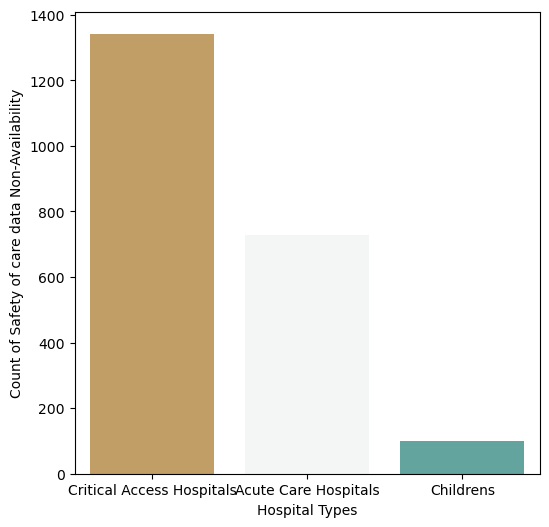

In [72]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.barplot(y=values, x=index, palette='BrBG')
ax.set(xlabel='Hospital Types', ylabel='Count of Safety of care data Non-Availability')

In [73]:
Readmission_NotAvailable = hospital_data.loc[hospital_data['Readmission national comparison']=='Not Available']
Readmission_NotAvailable['Readmission national comparison'].count()
Non_available_data = Readmission_NotAvailable.groupby('Hospital Type')['Readmission national comparison'].count()
Non_available_data.sort_values(ascending=False)
index = Non_available_data.sort_values(ascending=False).index
values = Non_available_data.sort_values(ascending=False).values

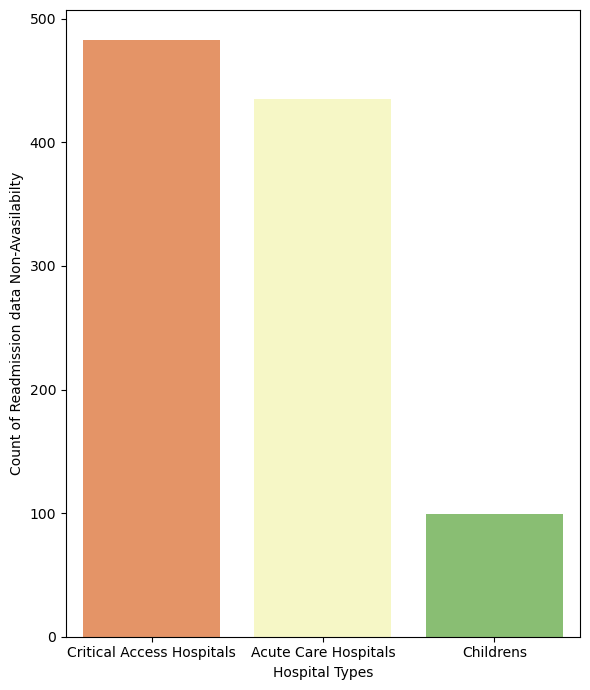

In [76]:
fig, ax = plt.subplots(figsize=(6,7))
ax = sns.barplot(y=values, x=index, palette='RdYlGn')
ax.set(xlabel='Hospital Types', ylabel='Count of Readmission data Non-Avasilabilty')
plt.tight_layout()

In [61]:
hospital_data['Mortality national comparison'].value_counts()

Same as the national average    2719
Not Available                   1352
Above the national average       400
Below the national average       341
Name: Mortality national comparison, dtype: int64

In [49]:
hospital_data['Hospital Type'].value_counts()

Acute Care Hospitals         3369
Critical Access Hospitals    1344
Childrens                      99
Name: Hospital Type, dtype: int64

In [48]:
hospital_data.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Hospital overall rating footnote',
       'Mortality national comparison',
       'Mortality national comparison footnote',
       'Safety of care national comparison',
       'Safety of care national comparison footnote',
       'Readmission national comparison',
       'Readmission national comparison footnote',
       'Patient experience national comparison',
       'Patient experience national comparison footnote',
       'Effectiveness of care national comparison',
       'Effectiveness of care national comparison footnote',
       'Timeliness of care national comparison',
       'Timeliness of care national comparison footnote',
       'Efficient use of medical imaging national comparison',
       'Efficient use of medi